In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Features to Consider

For a kNN model, there are two main choices to make for your algorithm - the choice of $k$, and the choice of distance metric.

## Choice of  $k$: How many neighbors?

Typically when classifying data, we want a sense of how well our classification algorithm will perform with, or generalize to, unseen data. But we also want an opportunity to tune, or find the best value, of the parameters of the model before we measure accuracy on the test data. Thus we use the ideas from Chapter __ to split the data into training and test data, as well as form a validation set from our training data to find the best choice of $k$.

We use cross validation to do this. In particular, k-fold validation (note this $k$ is different than the $k$ in kNN). This method of k-fold validation splits the training data into $k$ equal samples, or equal folds. The model is trained $k$ times where each time it is trained on $k-1$ folds and validated on the remaining fold of training data. The fold that serves as the validation set is changed each time until each fold has had an opportunity to validate. The resulting accuracies are averaged over all of the training.

The figure below [[1]](#1) shows an example of k-fold cross validation with $k=5$.

<!-- <img src="../../images/k_fold.png" alt="image" width="60%" height="auto"> -->

![k-fold](../../images/k_fold.png)

Thus, when deciding on a number of neighbors to help us classify a new data point, we can check performance on a different number of neighbors: $k=1, 2, 3,$ etc, using cross validation. This allows us to choose the smallest value of neighbors that results in the highest validation accuracy. 

## Choice of distance metric

Above we used the Euclidean distance to define a neghbor, but there are other options for this choice of metric.

The most commonly used distance is the **Euclidean distance**. This distance metric calculates the shortest line distance between points in the $xy$ coordinate plane and comes from the Pythogorean theorem.

Given points $p = (x_1, y_1)$,  $q = (x_2, y_2)$, we define the distance between these points as  
$$d(p,q) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$



This distance extends to multiple dimensions or multiple features $n$. In general, we have two points $p = (x_1, x_2, ..., x_n)$ and $q = (z_1, z_2, ..., z_n)$, the Euclidean distance is computed as

$$d(p,q) = \sqrt{(x_1-z_1)^2 + (x_2-z_2)^2+ ...(x_n-z_n)^2}$$

**Manhattan distance**, often called the taxicab distance, measures the distance between two points

Given points $p = (x_1, y_1)$,  $q = (x_2, y_2)$, we define the distance between these points as  
$$|x_1-x_2|+|y_1-y_2|,$$

which can also be extended to higher dimensions. For $n$ dimensions, with given input of two points $p = (x_1, x_2, ..., x_n)$ and $q = (z_1, z_2, ..., z_n)$, the distance is defined to be

$$d(p,q) = |x_1-z_1| + |x_2-z_2|+ ...|x_n-z_n|.$$

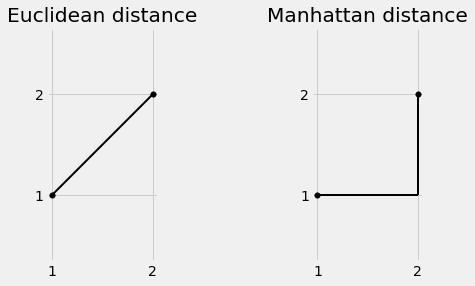

In [2]:
plt.subplot(1, 3, 1)
plt.plot((1, 2),(1,2),'black', linewidth=2);
plt.scatter(1,1 , color='black', s=30);
plt.scatter(2,2 , color='black', s=30);
plt.xticks([1,2])
plt.yticks([1,2])
plt.axis('equal');
plt.title("Euclidean distance");



plt.subplot(1, 3, 3)

plt.plot((1, 2),(1,1),'black', linewidth=2);
plt.plot((2, 2),(1,2),'black', linewidth=2);
plt.scatter(1,1 , color='black', s=30);
plt.scatter(2,2 , color='black', s=30);
plt.xticks([1,2])
plt.yticks([1,2])
plt.axis('equal');
plt.title("Manhattan distance");

**Chebyshev distance** measures the largest distance within a single coordinate.


For $n$ dimensions, with given input of two points $p = (x_1, x_2, ..., x_n)$ and $q = (z_1, z_2, ..., z_n)$, the distance is defined to be

$$d(p,q) = max(|x_1−z_1|,|x_2−z_2|, ....|x_n−z_n|)$$

In two dimensions, the Chebyshev distance can be thought of as taking the longer leg of the triangle formed between the two points of interest.

Examples of different distance metrics between two points $(1,1)$ and $(2,2)$.
Using the Euclidean distance, we have 
$$\sqrt{(2-1)^2+(2-1)^2}=\sqrt{2}$$

Using the Manhattan distance, we have 
$$|2-1|+|2-1| = 2$$


while the Chebyshev distance gives us 
$$max(|2-1|,|2-1|) = 1$$

Choice of distance function will depend on the problem of interest. In general, the goal is for a smaller distance between two points to indicate those points have the same class.

It has been shown that the Euclidean metric might not be the optimal choice for higher dimensional data [[2]](#2), where the Manhattan metric is preferred in most example cases.


#### References
<a id="1">[1]</a> 
Kumar, Ajitesh. “K-Fold Cross Validation in Machine Learning - Python Example.” Analytics Yogi, 3 Jan. 2024, vitalflux.com/k-fold-cross-validation-python-example/. 

<a id="2">[2]</a> 
Aggarwal, Charu C., et al. “On the Surprising Behavior of Distance Metrics in High Dimensional Space.” SpringerLink, Springer Berlin Heidelberg, 1 Jan. 1970, link.springer.com/chapter/10.1007/3-540-44503-X_27. 